In [1]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))
getwd()

[1] "/mnt/hdd/develop/kaggle/R_sources/house_prices"

In [3]:
source('main.R')
house_prices$helpers$import_libs()

combined_dataset <-
    # load data
    house_prices$helpers$load_data() %>%
    # remove outliers
    (house_prices$outliers$remove_outliers) %>%
    # fix NA values
    (house_prices$missing$categ$replace_with_most_common) %>%
    (house_prices$missing$categ$fix_valid) %>%
    (house_prices$missing$numeric$replace_with_zero) %>%
    mutate(
        price_log = log(SalePrice)
    ) %>%
    select(-SalePrice, -Id)

#####################
# transform numeric #
#####################

transformation_config <- house_prices$trans$numeric$get_transformation_config(combined_dataset)

transformation_config

combined_dataset <-
    house_prices$trans$numeric$apply_transform(combined_dataset, transformation_config)


dataset <- 
    combined_dataset %>% 
    filter(dataSource == 'train') %>% 
    select(-dataSource)

dataset %>% nrow
dataset %>% head

var,predictor,score
BsmtUnfSF,sqrt,79.97603
GrLivArea,log,91.15794
LotArea,log,73.38993
TotRmsAbvGrd,log,30.68502
X1stFlrSF,log,90.77166


[1] 1458

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price_log
60,RL,65,9.042040,Pave,_none_,Reg,Lvl,AllPub,Inside,⋯,0,_none_,_none_,_none_,0,2,2008,WD,Normal,12.24769
20,RL,80,9.169623,Pave,_none_,Reg,Lvl,AllPub,FR2,⋯,0,_none_,_none_,_none_,0,5,2007,WD,Normal,12.10901
60,RL,68,9.328212,Pave,_none_,IR1,Lvl,AllPub,Inside,⋯,0,_none_,_none_,_none_,0,9,2008,WD,Normal,12.31717
70,RL,60,9.164401,Pave,_none_,IR1,Lvl,AllPub,Corner,⋯,0,_none_,_none_,_none_,0,2,2006,WD,Abnorml,11.84940
60,RL,84,9.565284,Pave,_none_,IR1,Lvl,AllPub,FR2,⋯,0,_none_,_none_,_none_,0,12,2008,WD,Normal,12.42922
50,RL,85,9.555064,Pave,_none_,IR1,Lvl,AllPub,Inside,⋯,0,_none_,MnPrv,Shed,700,10,2009,WD,Normal,11.87060


In [4]:
L2Loss = function (vec) {
    sum(vec**2) / length(vec)
}

In [52]:
formulas_for_validation = data_frame(
    
    formula = c(
        'price_log ~ GrLivArea',
        'price_log ~ GrLivArea + OverallQual',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition + CentralAir',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition + CentralAir + LotArea',
        'price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition + CentralAir + LotArea + KitchenQual',
        'price_log ~ .'
    )
) %>%
mutate(
 formula_num = row_number()
)

formulas_for_validation

formula,formula_num
price_log ~ GrLivArea,1
price_log ~ GrLivArea + OverallQual,2
price_log ~ GrLivArea + OverallQual + BsmtFinSF1,3
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood,4
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea,5
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond,6
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF,7
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition,8
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition + CentralAir,9
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition + CentralAir + LotArea,10


In [111]:
iterate <- function(sample_index, totalset) {
    
    test_y <- totalset[-sample_index, 'price_log'][[1]]

    totalset <- 
        totalset %>% 
        mutate(price_log = replace(price_log, -sample_index, NA))

    totalset <-
        house_prices$trans$categ$rating_transform(totalset, price_log)

    trainset <- totalset[sample_index,]
    testset <- totalset[-sample_index,]

    formulas_for_validation %>%
    mutate(
        model = map(formula, ~lm(as.formula(.), data=trainset)),

        r2 = map_dbl(model, function (mod) {
            summary(mod)$r.squared
        }),

        L2_train = map_dbl(model, function (mod) {
            augment <- broom::augment(mod)
            L2Loss(augment[['price_log']] - augment$.fitted)
        }),

        L2_test = map_dbl(model, function (mod) {
            test_predicted <- predict(mod, testset)
            L2Loss(test_predicted - test_y)
        })
    ) %>%
    select(-model)
}

In [98]:
dataset <- 
    combined_dataset %>% 
    filter(dataSource == 'train') %>% 
    select(-dataSource)

dataset %>% nrow

set.seed(8)
suppressWarnings(
    caret::createDataPartition(
        y = dataset[['price_log']], 
        p = 0.5, 
        list = T, 
        times = 10
    ) %>%
    map(function (sample_index) { iterate(sample_index, dataset) })
) %>% 
bind_rows(.id='sample') -> report

[1] 1458

In [104]:
avg_report <-
    report %>%
    group_by(formula_num) %>%
    summarise(
        r2 = mean(r2),
        L2_train = mean(L2_train),
        L2_test = mean(L2_test)
    ) %>%
    mutate(
        L2_test_gain = lag(L2_test) - L2_test
    )

avg_report

formula_num,r2,L2_train,L2_test,L2_test_gain
1,0.5346979,0.07316471,0.07269288,NA
2,0.7621208,0.03739894,0.03804852,0.0346443616
3,0.8077237,0.03023059,0.03017908,0.0078694372
4,0.8456728,0.02425718,0.02433128,0.0058478026
5,0.8579926,0.02232132,0.02243408,0.0018972051
6,0.8702364,0.02039400,0.02034375,0.0020903285
7,0.8805898,0.01876409,0.01856442,0.0017793320
8,0.8874012,0.01769527,0.01773773,0.0008266839
9,0.8922032,0.01693541,0.01695934,0.0007783936
10,0.8960498,0.01633024,0.01622309,0.0007362447


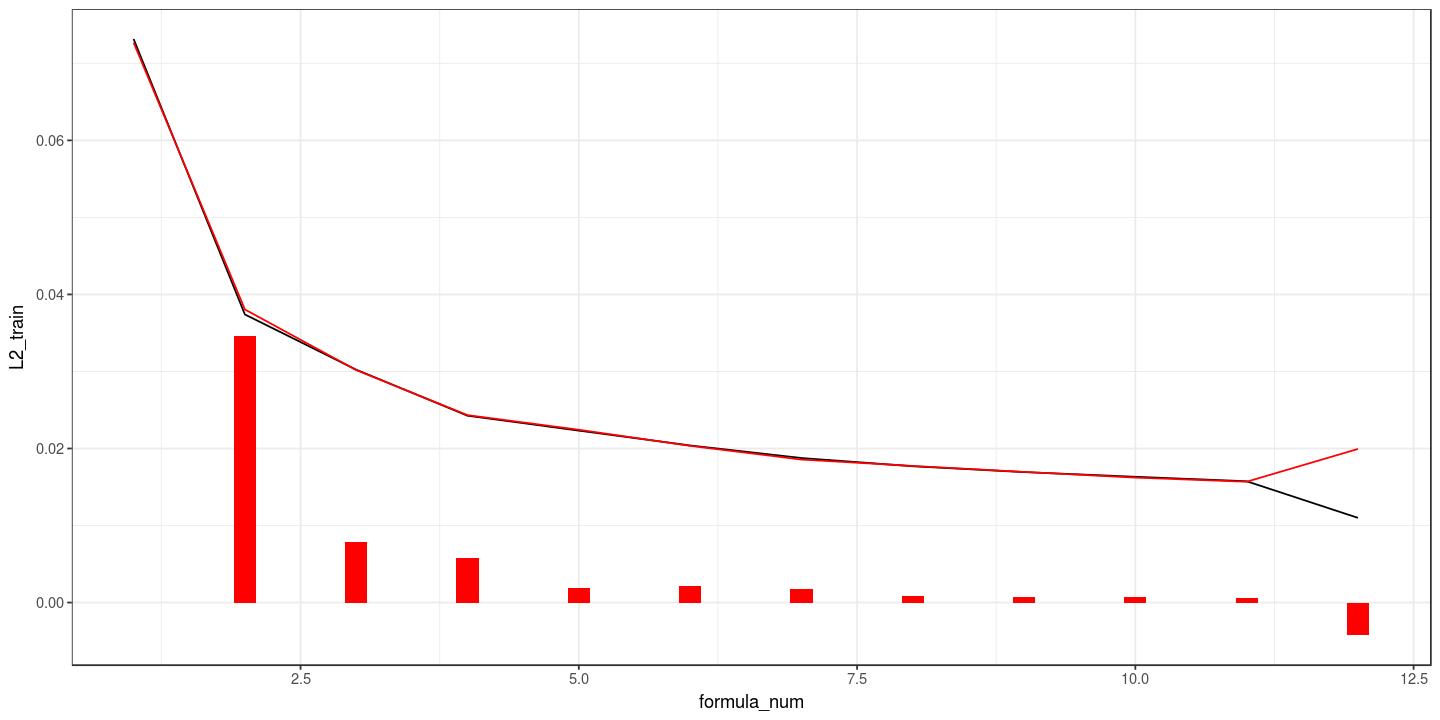

In [102]:
options(repr.plot.width = 12, repr.plot.height = 6)

avg_report %>% 
ggplot() +
geom_line(aes(x=formula_num, y=L2_train, group=1)) +
geom_line(aes(x=formula_num, y=L2_test, group=1), color='red') +
geom_bar(data=z %>% na.omit, aes(x=formula_num, y=L2_test_gain), stat="identity", width=0.2, fill='red') +
theme_bw()

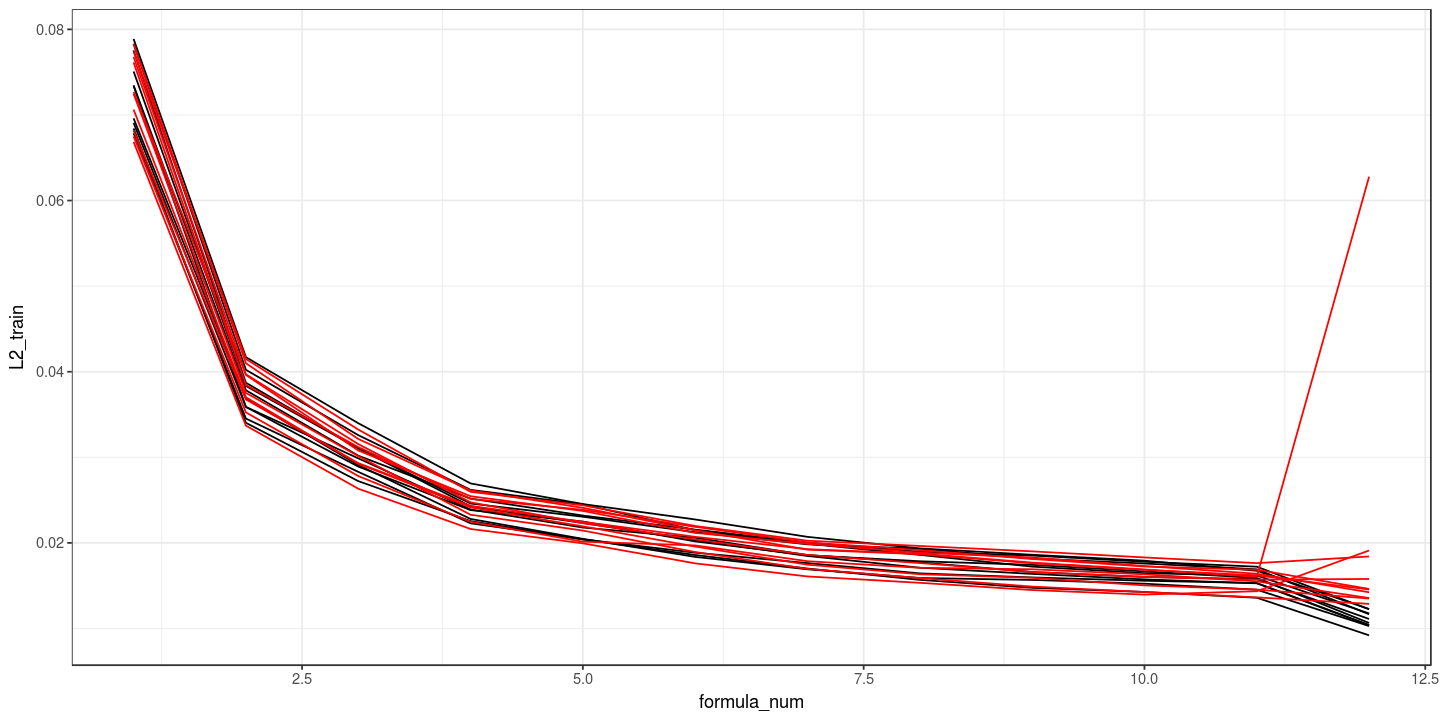

In [103]:
options(repr.plot.width = 12, repr.plot.height = 6)

report %>% 
ggplot() +
geom_line(aes(x=formula_num, y=L2_train, group=sample)) +
geom_line(aes(x=formula_num, y=L2_test, group=sample), color='red') +
theme_bw()

In [126]:
iterate2 <- function(sample_index, totalset) {
    
    test_y <- totalset[-sample_index, 'price_log'][[1]]

    totalset <- 
        totalset %>% 
        mutate(price_log = replace(price_log, -sample_index, NA))
    
    print(totalset %>% nrow)
    start_time <- Sys.time()
    totalset <- house_prices$trans$categ$rating_transform(totalset, price_log)
    end_time <- Sys.time()
    print(end_time - start_time)
    
    trainset <- totalset[sample_index,]
    testset <- totalset[-sample_index,]
    
    formulas_for_validation %>%
    mutate(
        model = map(formula, ~lm(as.formula(.), data=trainset)),

        r2 = map_dbl(model, function (mod) {
            summary(mod)$r.squared
        }),

        L2_train = map_dbl(model, function (mod) {
            augment <- broom::augment(mod)
            L2Loss(augment[['price_log']] - augment$.fitted)
        }),

        L2_test = map_dbl(model, function (mod) {
            test_predicted <- predict(mod, testset)
            L2Loss(test_predicted - test_y)
        })
    ) %>%
    select(-model) -> report
    
    report
}


dataset <- 
    combined_dataset %>% 
    filter(dataSource == 'train') %>% 
    select(-dataSource) %>%
    sample_n(1000)

dataset %>% nrow

set.seed(8)
caret::createDataPartition(
    y = dataset[['price_log']], 
    p = 0.5, 
    list = T, 
    times = 1
)[[1]] -> sample_index

sample_index %>% length

suppressWarnings(
    
    iterate2(sample_index, dataset)
) -> report


report

[1] 1000

[1] 501

[1] 1000
Time difference of 0.245455 secs


formula,formula_num,r2,L2_train,L2_test
price_log ~ GrLivArea,1,0.5529663,0.07333753,0.07007767
price_log ~ GrLivArea + OverallQual,2,0.7616532,0.03910167,0.03459617
price_log ~ GrLivArea + OverallQual + BsmtFinSF1,3,0.8054682,0.03191367,0.02768900
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood,4,0.8486837,0.02482400,0.02377947
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea,5,0.8588462,0.02315680,0.02138668
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond,6,0.8710405,0.02115628,0.01924356
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF,7,0.8836726,0.01908394,0.01779807
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition,8,0.8915751,0.01778751,0.01792820
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition + CentralAir,9,0.8987909,0.01660372,0.01695483
price_log ~ GrLivArea + OverallQual + BsmtFinSF1 + Neighborhood + GarageArea + OverallCond + TotalBsmtSF + SaleCondition + CentralAir + LotArea,10,0.9014290,0.01617095,0.01623481
